# 군집화
## K평균 알고리즘
K평균: 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법  
K평균 장점: 일반적으로 가장 많이 활용되며 알고리즘이 쉽고 간단  
K평균 단점: 거리 기반으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐, 반복횟수가 많은 경우 수행시간 증가, 몇 개의 군집을 선택해야 할지 가이드가 어려움

KMeans클래스 주요 파라미터  
n_clusters: 군집화할 개수(군집 중심점의 개수)  
init: 초기에 군집 중심점 좌표를 설정할 방식  
max_iter: 최대 반복 횟수

fit(데이터세트) 혹은 fit_transform(데이터세트)로 수행  
주요 속성  
labels_: 각 데이터 포인트가 속한 군집 중심점 레이블  
cluster_centers_:각 군집 중심점 좌표(shape는 [군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표 시각화 가능

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
iris = load_iris()

#더 편리한 핸들링을 위해 DF로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
#3개의 그룹으로 군집화 n_clusters = 3 초기 중심점 방식은 k-means++(디폴트), 최대반복횟수 max_iter = 300(디폴트)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)
#이는 각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
#실제 붓꽃 품종 분류값과 얼마나 차이가 나는 지 확인
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
#붓꽃 데이터세트의 군집을 시각화
#붓꽃 데이터세트의 속성이 4개이므로 PCA를 통해 2개로 차원 축소한 뒤 개별 데이터 표현
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


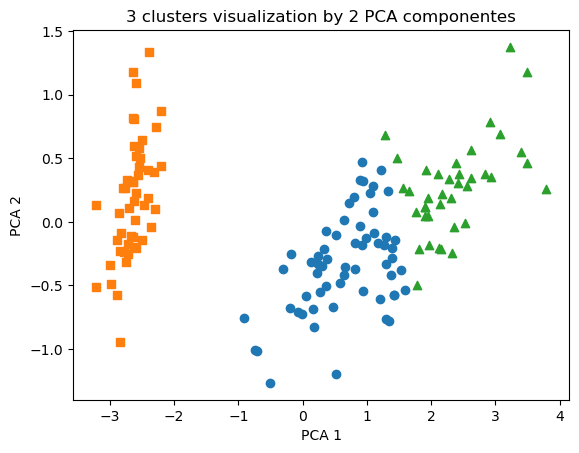

In [6]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^로 마커 표시
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA componentes')
plt.show()

### 군집화 알고리즘을 위한 데이터셋 생성
대표적 군집화 데이터 생성기: make_blobs(), make_classification()  
make_blobs()는 개별 군집의 중심점과 표준 편차 제어기능이 추가  
make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용  

make_blobs()를 호출하면 피처 데이터세트와 타깃 데이터세트가 튜플로 반환  
make_blobs()의 호출 파라미터  
n_samples : 생성할 총 데이터 개수, 디폴트 100  
n_features: 데이터의 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫번째 피처는 x좌표, 두번째 피처는 y좌표상에 표현  
centers: int값(3 등)으로 설정하면 군집의 개수, ndarray형태로 설정하면 개별 군집 중심점의 좌표  
cluster_std: 생성될 군집 데이터의 표준 편차, [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫번째 군집 내 데이터 표준편차는 0.8, 두번째 군집 내 데이터 표준편차는 1.2, 세번째 군집 내 데이터 표준편차는 0.6으로 만듦, 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용

In [7]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

#y target 값의 분포를 확인 
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

#X는 200개의 레코드와 2개의 피처를 가지므로 shape는 (200,2), 군집타깃데이터세트인 y의 shape는 (200,)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
#DF로 변환
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


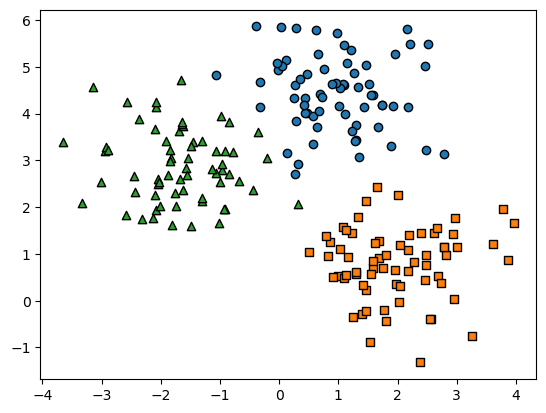

In [9]:
target_list = np.unique(y)
#각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
plt.show()

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


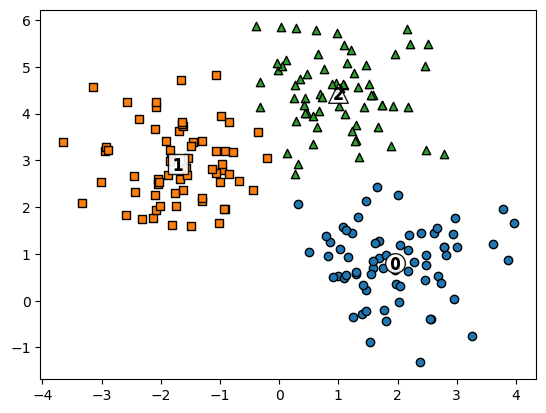

In [10]:
#이 데이터에 군집화 적용한 뒤 시각화
#KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']
#군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])

    #군집별 중심 위치 좌표 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: kmeans_label, dtype: int64


### 군집 평가
군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표는?  
대표적인 방법으로 실루엣분석  
실루엣분석은 실루엣계수를 기반으로 함  
실루엣계수는 개별 데이터가 가지는 군집화 지표, 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표  

a(i): 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값  
b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리  
s(i) = ( b(i) - a(i) ) / max( a(i), b(i) )  
실루엣계수는 -1과 1사이의 값을 가짐  
1로 가까울수록 근처의 군집과 더 멀러 떨어져 있다는 것, 0에 가까울수록 군집과 가까워 짐, -값은 아예 다른 군집에 데이터포인트가 할당됐음을 의미  

실루엣분석을 위한 메서드  
sklearn.metrics.silhouette_samples(X, labels, metric = 'euclidean', **kwds): 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환  
sklearn.metrics.silhouette_score(X, labels, metric = 'euclidean', sample_size = None, **kwds): 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels데이터를 입력해주면 전체 데이터의 실루엣계수 값을 평균해 반환. 즉 np.mean(silhouette_samples()). 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단

### 붓꽃 데이터 세트를 이용한 군집 평가

In [12]:
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
features_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = features_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.551


C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [13]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()
#1번 군집은 0.79인데 반해 0번은 0.42, 2번은 0.44로 상대적으로 낮음

cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

## 평균이동
평균이동: k평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이며 군집화를 수행하지만 평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴

군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안  
이를 위해 확률밀도함수(Pdf) 이용  
가장 집중적으로 데이터가 모여있어 확률밀도함수가 피크인 점을 군집 중심점으로 선정, 일반적으로 주어진 모델의 확률밀도함수를 찾기 위해 KDE를 이용  

주변 데이터와의 거리 값을 KDE함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취함  
이러한 방식을 전체 데이터에 반복적으로 적용하며 데이터의 군집 중심점을 찾아냄

Kde: 커널함수를 통해 어떤 변수의 확률밀도함수를 추정하는 대표적인 방법  
대표적인 커널함수로 가우시안 분포 함수가 사용

Kde의 대역폭 h는 Kde형태를 부드러운(또는 뾰족한)형태로 평활화하는데에 적용  
작은 h값은 좁고 뾰족한 Kde를 가지게 되며 이는 과적합 쉬움  
큰 h값은 과도하게 평활화된 Kde로 인해 지나치게 단순화되므로 과소적합 쉬움

일반적으로 평균이동군집화는 대역폭이 클 수록 평활화된 Kde로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐  
또한 평균이동군집화는 군집의 개수를 지정하지 않으며 오직 대역폭의 크기에 따라 군집화를 수행  
사이킷런은 MeanShift 클래스 제공  
가장 중요 초기화 파라미터  
bandwidth: Kde의 대역폭 h, 최적의 대역폭 계산을 위해 estimate_bandwidth()함수를 제공  

In [14]:
from sklearn.cluster import MeanShift
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)
meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [15]:
#bandwidth를 살짝 높인 1로 설정
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [16]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [17]:
#위 값을 이용해 군집화 수행
clusterDF = pd.DataFrame(data= X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

#estimate_bandwidth로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


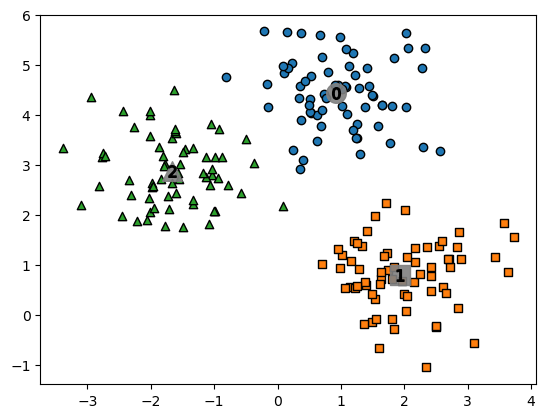

In [18]:
#cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있음
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors='k', marker = markers[label])
    #군집별 중심 표현
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'gray', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
    
plt.show()

In [19]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


## GMM(Gaussian Mixture Model)
GMM군집화: 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(정규분포)를 가진 데이터 집합들이 섞여 생성된 것이라는 가정하에 군집화 수행  
1000개의 데이터 세트가 있으면 이를 구성하는 여러 개의 정규분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정하는 방식  
이와 같은 방식은 모수 추정이라고 함, 모수추정은 대표적으로 다음 2가지를 추정함  
1. 개별 정규 분포의 평균과 분산
2. 각 데이터가 어떤 정규 분포에 해당되는지의 확률

이러한 모수 추정을 위해 GMM은 EM(Expectaion and Maximization) 방법을 적용  
GaussianMixture 클래스 지원

### GMM을 이용한 붓꽃 데이터 세트 군집화

In [20]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

GaussianMixture객체의 가장 중요한 초기화 파라미터: n_components(gaussian mixture 모델의 총 개수)  

In [21]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

#target값에 따라 gmm_cluster값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### GMM과 K-평균의 비교
KMeans는 원형의 범위에서 군집화를 수행. 데이터세트가 원형의 범위를 가질수록 KMeans의 군집화 효율이 높아짐  
그러나 데이터가 길쭉한 타원형으로 늘어선 경우 군집화를 잘 수행하지 못함  

In [22]:
# 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

clusterobj: 사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit()과 predict()로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None입력  
dataframe : 피처 데이터 세트와 label값을 가진 DataFrame  
label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs()결과 시각화일 경우는 dataframe 내의 target 칼럼명  
iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 아니면 False

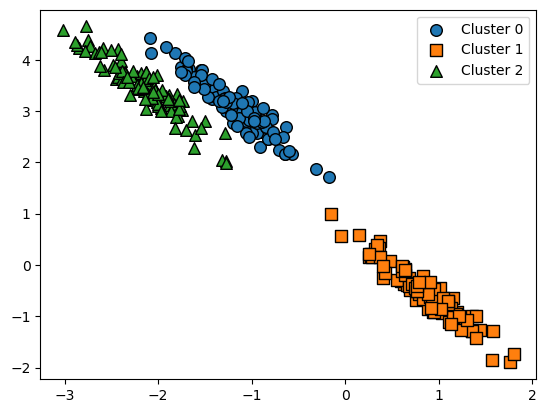

In [23]:
#make_blobs()로 300개 데이터 세트, 3개의 군집 세트, cluster_std = 0.5를 만듦
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.5, random_state = 0)

#길게 늘어선 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data = X_aniso, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


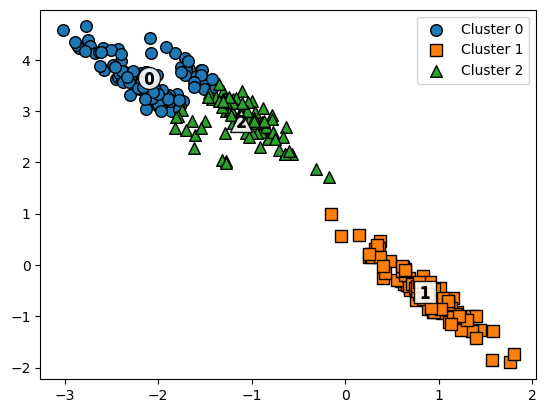

In [24]:
#3개의 군집 기반 KMeans를 X_aniso 데이터세트에 적용
kmeans = KMeans(3, random_state = 0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter = True)

KMeans의 경우 원형 영역 위치로 개별 군집화가 되며 원하는 방향으로 구성되지 않음

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


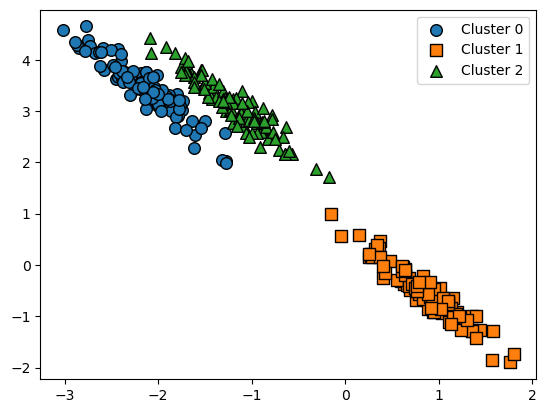

In [25]:
#3개의 n_components 기반 GMM을 X_aniso 데이터세트에 적용
gmm = GaussianMixture(n_components=3, random_state = 0)
gmm_label = gmm.fit_predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#GaussianMixture는 cluster_cnters_속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter = False)

데이터가 분포된 방향에 따라 정확하게 군집화 됨  
GMM은 K-평균과 달리 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 시각화되지 않음

In [26]:
#군집화 효율 차이 비교
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


이처럼 GMM의 경우 Kmeans보다 유연하게 다양한 데이터 세트에 적용될 수 있지만 수행 시간이 오래 걸린다는 단점이 존재함

## DBSCAN
특정 공간 내 데이터 밀도 차이를 기반 알고리즘으로 하여 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화 수행 가능  
입실론 주변영역: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역  
최소 데이터 개수: 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

핵심 포인트: 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함  
이웃 포인트: 주변 영역 내에 위치한 타 데이터  
경계 포인트: 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터  
잡음 포인트: 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터

특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하며 군집화를 구성, 이러한 방식으로 점차적으로 군집 영역을 확장해 나가는 것이 DBSCAN 군집화 방식  
경계 포인트는 군집의 외곽을 형성

DBSCAN 클래스  
eps: 입실론 주변 영역의 반경  
min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수

## DBSCAN 적용 - 붓꽃 데이터 세트

In [29]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미  
DBSCAN은 군집의 수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미

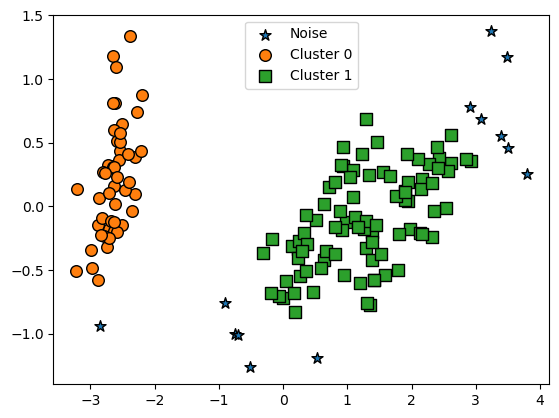

In [31]:
#군집화 데이터세트 시각화
from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components = 2로 피처 데이터 세트 변환
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)
#visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

In [40]:
#eps를 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다
dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


## DBSCAN 적용하기 - make_circles() 데이터세트
make_circles(): 2개의 피처만을 생성, 내부 원과 외부 원 형태로 돼있는 2차원 데이터 세트 만들기  
파라미터 noise: 노이즈 데이터 비율  
factor: 외부 원과 내부 원의 scale 비율

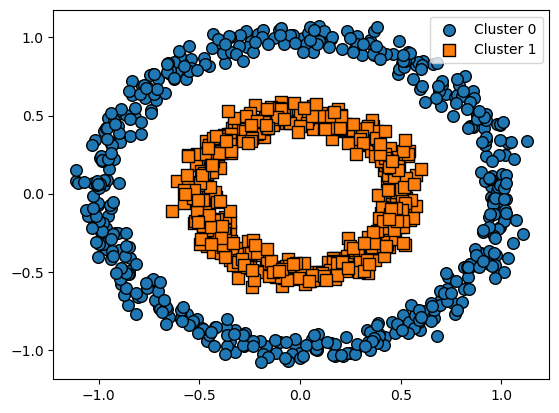

In [46]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


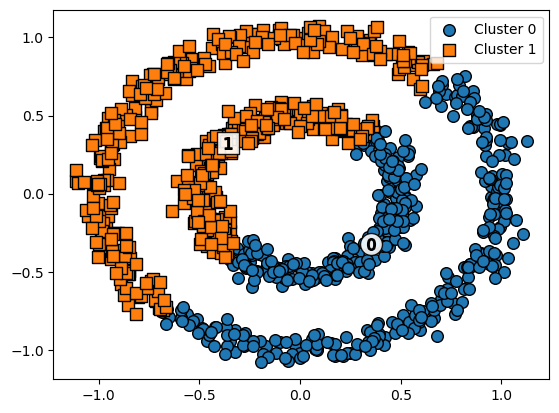

In [47]:
#KMeans로 make_circles()의 데이터 세트를 군집화 수행
kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter = True)

거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

C:\Users\motor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


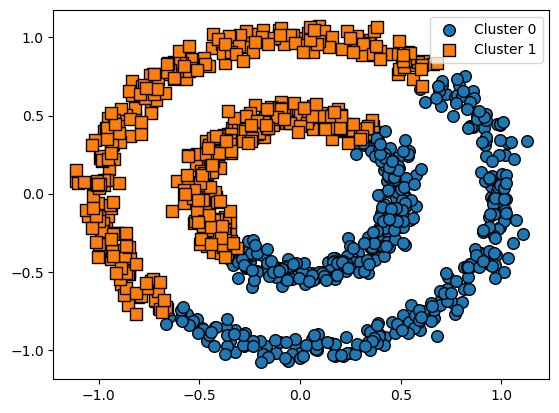

In [49]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm_label = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter = False)

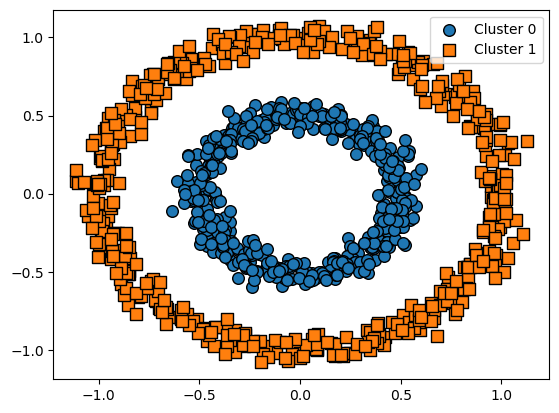

In [50]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_labels'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_labels', iscenter = False)

## 군집화 실습 - 고객 세그멘테이션

In [52]:
import datetime
import math
retail_df = pd.read_excel(io = 'Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [53]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [54]:
#Null 데이터 제거
#오류 데이터 삭제
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [57]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
print(retail_df.shape)

(354321, 8)


### RFM 기반 데이터 가공
UnitPrice와 Quantity를 곱해서 주문 금액 데이터를 만듦  
CustomerNO도 float형을 int형으로 변환

In [58]:
retail_df['sale_amount'] = retail_df['UnitPrice'] * retail_df['Quantity']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [61]:
print(retail_df['CustomerID'].value_counts().head(5), '\n')
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending = False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64 

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


주문번호 + 상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경  
이를 위해 주문번호 기준의 데이터를 고객 기준의 데이터로 그룹바이

In [63]:
#DataFrame의 groupby()의  multiple 연산을 위해 agg() 이용
#Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
#Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
#groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


온라인 판매 데이터가 2011년 12월 9일까지의 데이터이므로 2011년 12월 10일을 현재 날짜로 간주

In [64]:
import datetime as dt
cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는 ', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM기반 고객 세그멘테이션

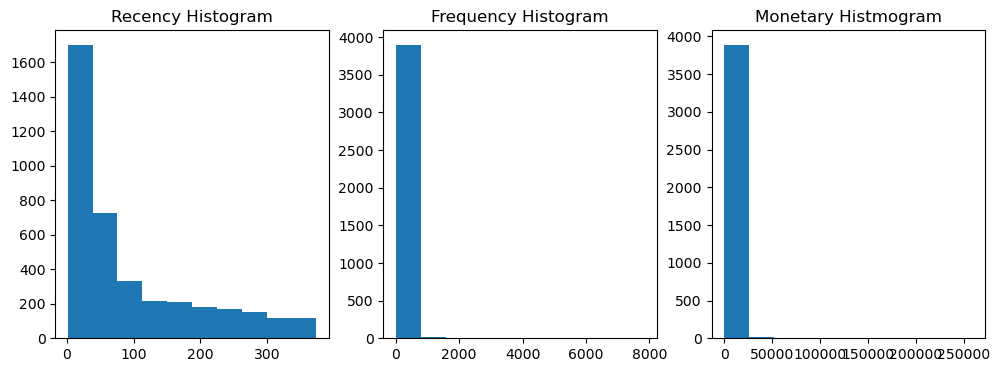

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (12,4), nrows = 1, ncols = 3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histmogram')
ax3.hist(cust_df['Monetary'])

plt.show()

In [66]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [68]:
#standardscaler로 스케일링 적용
from sklearn.preprocessing import StandardScaler
X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters =3, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는: 0.576


In [72]:
#Recency, Frequency, Monetary 칼럼에 np.log1p로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary'] = np.log1p(cust_df['Monetary'])

#Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 3, random_state = 0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_labels'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는: 0.297


실루엣스코어는 떨어졌지만 중요한 것은 어떻게 개별 군집이 더 균일하게 나뉠 수 있는가임